<a href="https://colab.research.google.com/github/kulkarnirahua/UTAT-AIML/blob/main/Neural_Networks_Bank_Churn_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

Build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics
from sklearn import metrics
from tensorflow.keras import backend
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
# importing GridSearch CV
from sklearn.model_selection import GridSearchCV
# importing roc_curve to plot
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# importing SMOTE
from imblearn.over_sampling import SMOTE
# importing metrics
from sklearn import metrics
import random
#Importing classback API
from keras import callbacks

**Mounting the drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [ ]:
ds = pd.read_csv("/content/bank.csv")

## Data Overview

### View the first and last 5 rows of the dataset.

In [ ]:
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
ds.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Understand the shape of the dataset

In [ ]:
ds.shape

(10000, 14)

* There are 10000 customer detailes with 14 attributes

### Check the data types of the columns for the dataset

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* As you can see, there are no null values in any of the column of this dataset

### Checking the Statistical Summary

In [ ]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


- Rownumber, CustomerId, and Surname are unique for each customer so they do not provide any value and need to be dropped.
- The median Age is 37 years old, the yougest 18 and oldest 92 years old.
- The median credit score is 652 close to the mean, which indicate a notmal distribution.
- The median balance is about 97k, max is about 250k
- Min Salary is 11k and max is about 199k

### Checking for unique values for each of the column

In [ ]:
ds.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

- We can drop the column - RowNumber, CustomerId as it is unique for each customer and will not add value to the model.
- We can also drop the surname of the customer, since it will add any value to the model.

### Checking for Missing Values

In [ ]:
ds.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* There are no null values in the data.

### Drop the columns which are unique for all users like IDs, names, and rownumbers

In [ ]:
#RowNumber , CustomerId and Surname are unique hence dropping it
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

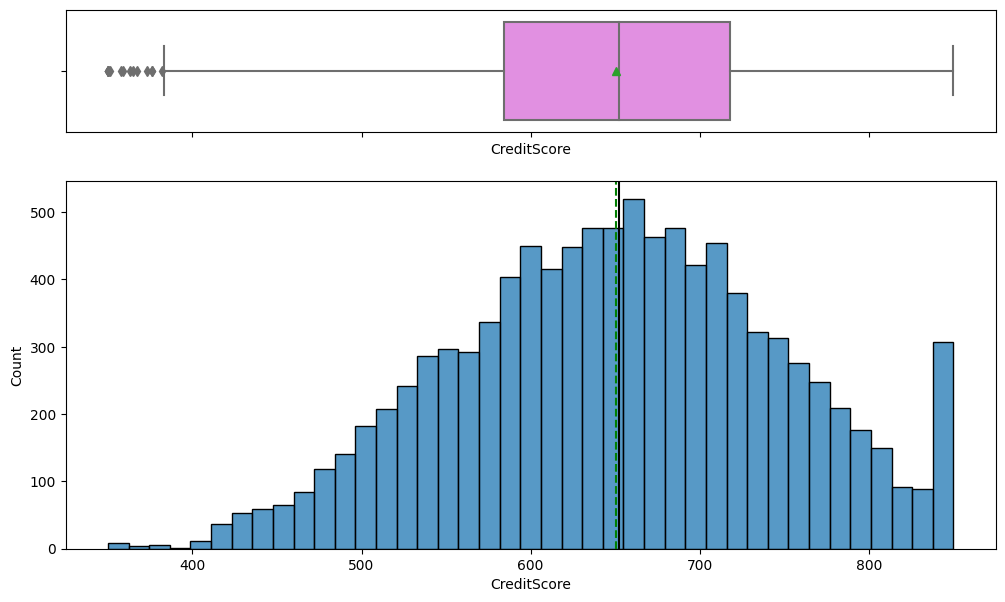

In [ ]:
histogram_boxplot(ds,'CreditScore')

- Distribution is almost normal
- There are some outliers but still in the expected credit score range

#### Observations on Age

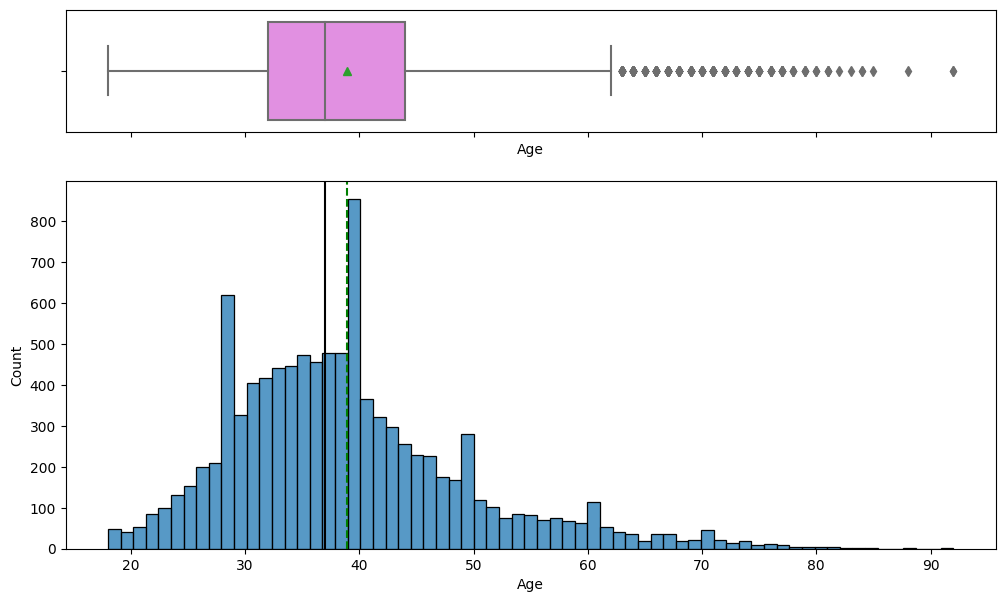

In [ ]:
histogram_boxplot(ds,'Age')

- Distribution is right skewed
- There are some outliers in the right side, these are people elderly people.

#### Observations on Balance

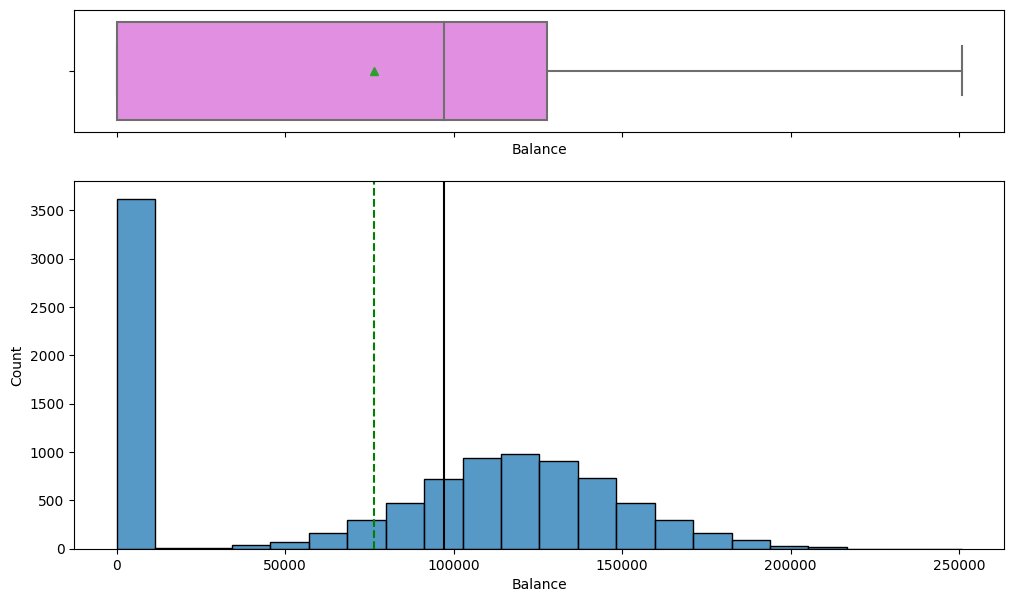

In [ ]:
histogram_boxplot(ds,'Balance')

- Distribution is left skewed due to having a great number of customers with 0 balance. Otherwise the distribution would have been normal.
- There are no outliers.

#### Observations on Estimated Salary

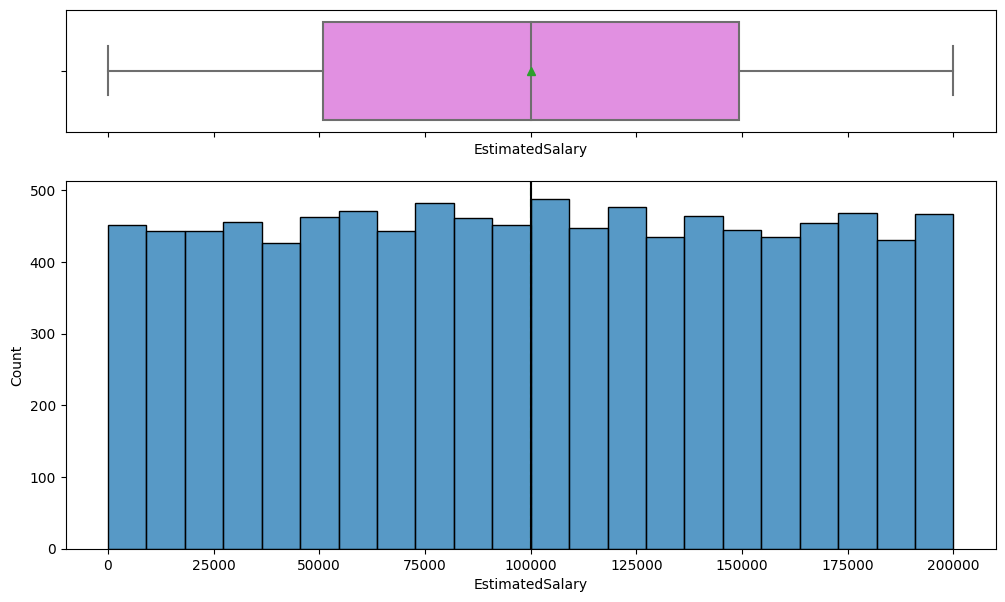

In [ ]:
histogram_boxplot(ds,'EstimatedSalary')

- Distribution is normal
- No outliers

#### Observations on Exited

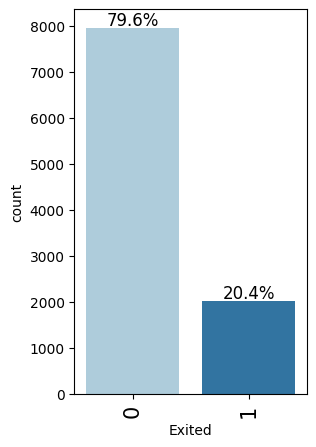

In [ ]:
labeled_barplot(ds, "Exited", perc=True)

- Almost 80% of the observations are not Churn
- A little more than 20% are Churn
- The data is imbalance

#### Observations on Geography

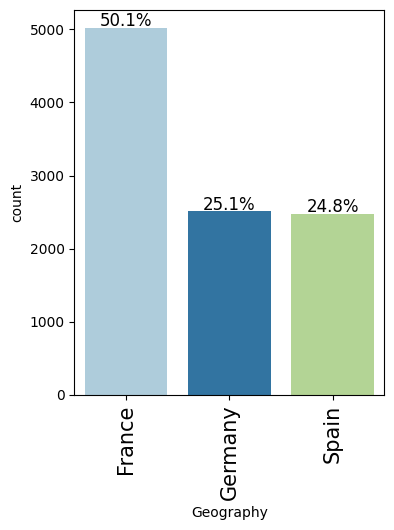

In [ ]:
labeled_barplot(ds, "Geography", perc=True)

- France has the most observations
- Germany and Spain are almost the same

#### Observations on Gender

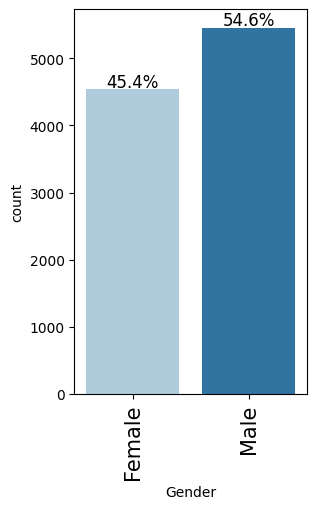

In [ ]:
labeled_barplot(ds, "Gender", perc=True)

- There are more male than female customers.

#### Observations on Tenure

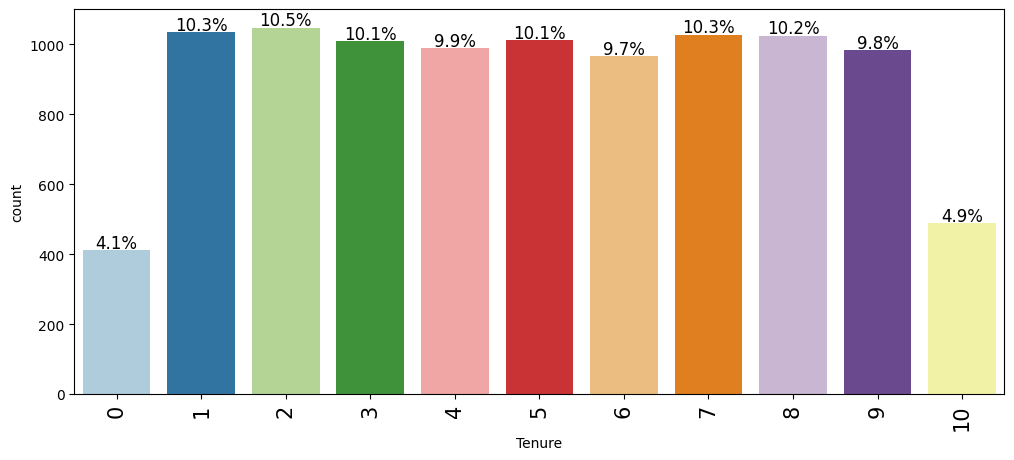

In [ ]:
labeled_barplot(ds, "Tenure", perc=True)

- Tenures 0 and 10 are almost the same and the lowest of all at around 4.5 average.
- Tenures 1 to 9 are almost the same at 10.2 average

#### Observations on Number of Products

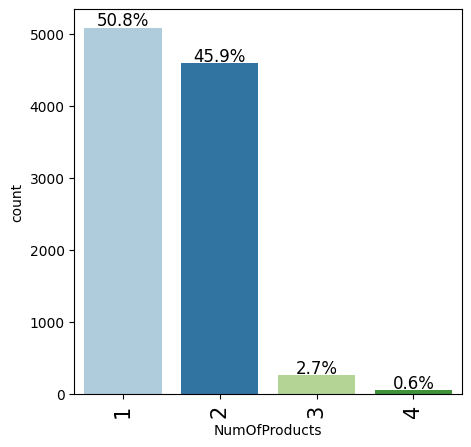

In [ ]:
labeled_barplot(ds, "NumOfProducts", perc=True)

- Most Customers have 1 product at 50.8%
- 96.7% of customers have 1 to 2 products.
- Very few customers have more than 2 products (3.3%)

#### Observations on Has Credit Card

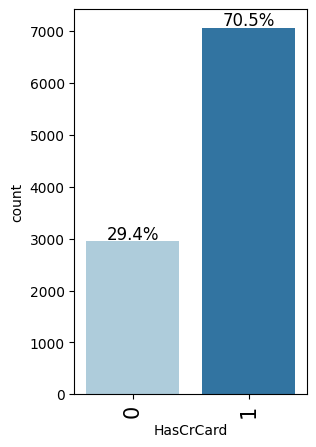

In [ ]:
labeled_barplot(ds, "HasCrCard", perc=True)

- 70.5% have a credit card

#### Observations on Is Active Member

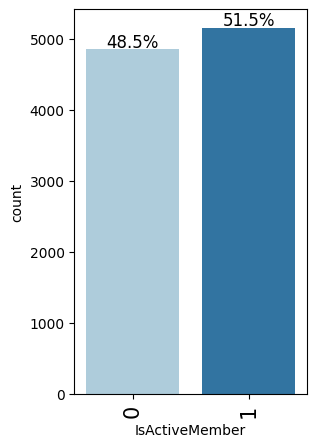

In [ ]:
labeled_barplot(ds, "IsActiveMember", perc=True)

- There are more active than inactive members at 51.5%

### Bivariate Analysis

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

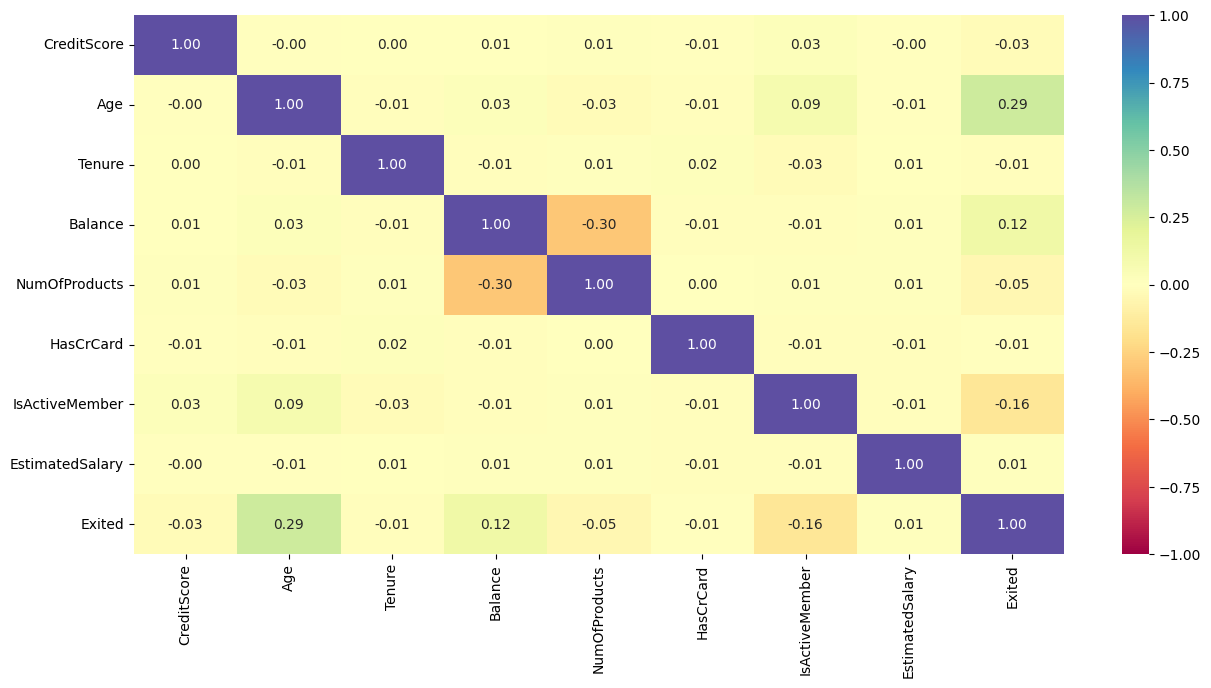

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* None of the columns are strongly corelated with each other. There is no multicollinearity.

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


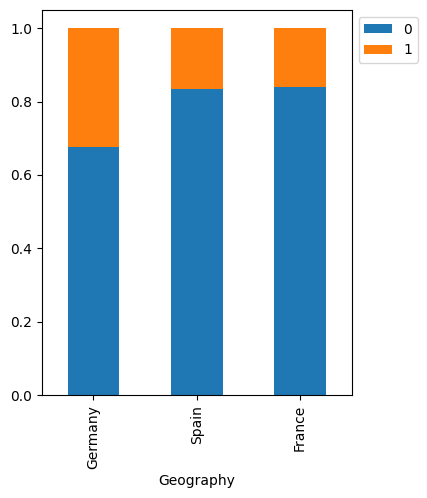

In [ ]:
stacked_barplot(ds, "Geography", "Exited" )

- Majority of the customers are churned from the Germany.

#### Exited Vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


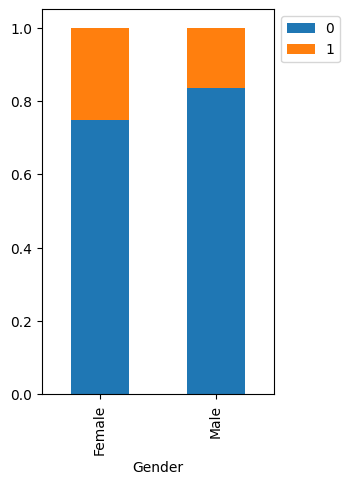

In [ ]:
stacked_barplot(ds, "Gender", "Exited" )

- The proportion of female customers churning is greater than that of male customers.

#### Exited Vs Has Credit Card

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


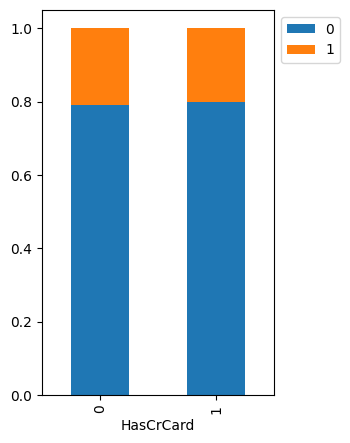

In [ ]:
stacked_barplot(ds, "HasCrCard", "Exited" )

- No major difference both the categories

#### Exited Vs Is active member

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


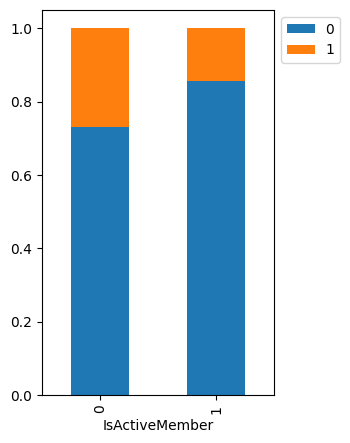

In [ ]:
stacked_barplot(ds, "IsActiveMember", "Exited" )

- Unsurprisingly the inactive members have a greater churn.

#### Exited Vs Credit Score

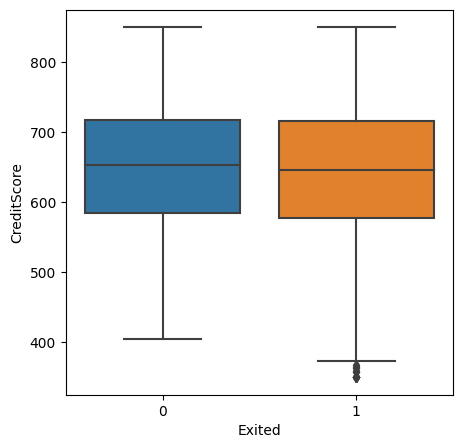

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

- There is no significant difference in the credit score distribution between retained and churned customers.

#### Exited Vs Age

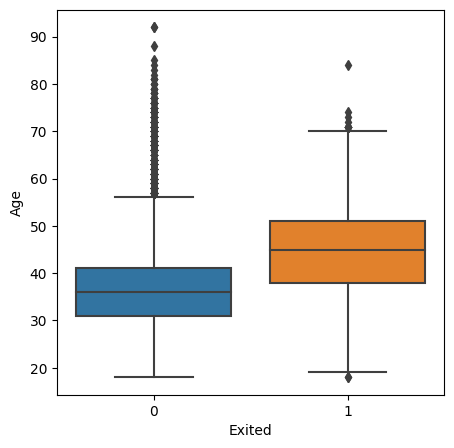

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=ds)
plt.show()

- The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories.

#### Exited Vs Tenure

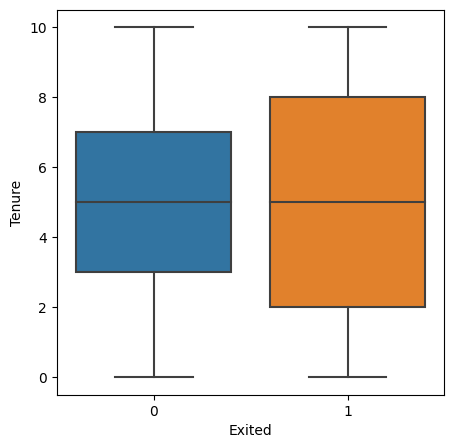

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=ds)
plt.show()

- Although the median Tenure for churn and not churn is the same, there are more churn people with a greater range of Tenure.

#### Exited Vs Balance

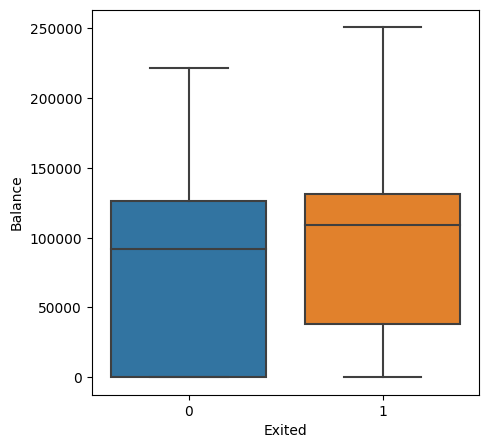

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=ds)
plt.show()

- Worryingly, the bank is losing customers with significant bank balances which are likely to hit their available capital for lending.

#### Exited Vs Number of Products

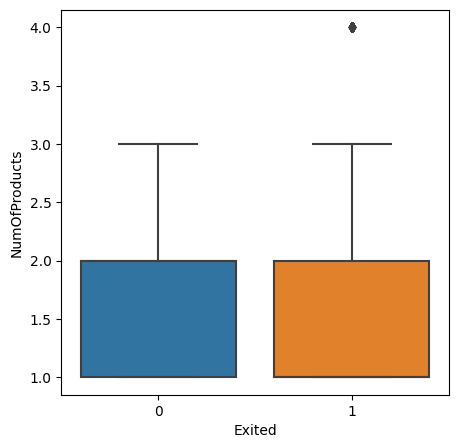

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=ds)
plt.show()

- Number of products does not appear to have any effect on churn or not churn customers. Data seems the same for both groups.

#### Exited Vs Estimated Salary

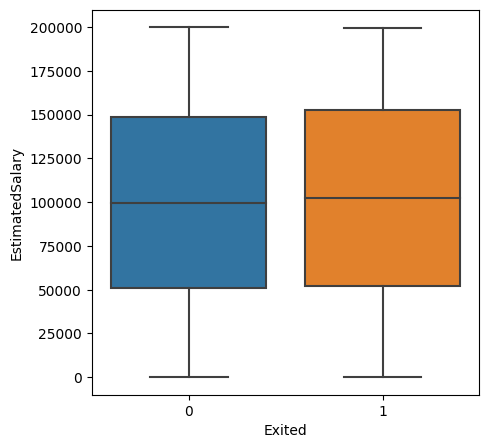

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=ds)
plt.show()

- Estimated Salary does not seem to have an effect on churn or not churn customers since both groups seem identical.

## Data Preprocessing

### Data Preparation for Modeling

In [ ]:
X = ds.drop(['Exited'],axis=1) # Credit Score through Estimated Salary
y = ds[['Exited']] # Exited

In [ ]:
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True)

In [ ]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X_large,y_large, test_size = 0.2, random_state = 42,stratify=y_large, shuffle = True)

**Let's create dummy variables for string type variables**

In [ ]:
# Encoding Geography variable
X_train = pd.get_dummies(X_train, columns=["Geography","Gender"],drop_first=True)
X_test = pd.get_dummies(X_test, columns=["Geography","Gender"],drop_first=True)
X_val = pd.get_dummies(X_val, columns=["Geography","Gender"],drop_first=True)

**Let's normalize the numerical data**

Since all the numerical values are on a different scale, so we will be scaling all the numerical values to bring them to the same scale.

In [ ]:
sc=StandardScaler()
temp = sc.fit(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])

## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**
* Predicting a customer is exiting  and the customer  is not exiting
* Predicting a customer is not exiting and  customer is  exiting

**Which case is more important?**
* Predicting that customer is not exiting but he/she is exiting. It might cause loss to the banks because due to wrong identification bank will not be able to take any initiative for those sensitive customers.

**How to reduce this loss i.e need to reduce False Negative?**
* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the bank can retain their customers.

**Let's create a function for plotting the confusion matrix**



In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

### Model Building: Neural Network

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the ANN
classifier = Sequential()
# Adding the input layer with 64 neurons with relu as activation function with input of 11 variables
classifier.add(Dense(activation = 'relu', input_dim = 11, units=64))
#Adding 1st hidden layer with 32 neurons
classifier.add(Dense(32, activation='relu'))
# Adding the output layer
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
classifier.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Compiling the model with SGD optimizer and binary cross entropy as loss with accuracy as metrics
classifier.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Model summary
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting the model
history=classifier.fit(X_train, y_train,
          validation_data=(X_val,y_val),
          epochs=100,
          batch_size=32)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.5214 - accuracy: 0.7875 - val_loss: 0.4830 - val_accuracy: 0.7962
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4739 - accuracy: 0.7964 - val_loss: 0.4583 - val_accuracy: 0.7969
Epoch 3/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4546 - accuracy: 0.7969 - val_loss: 0.4439 - val_accuracy: 0.8019
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4424 - accuracy: 0.8005 - val_loss: 0.4357 - val_accuracy: 0.8075
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4346 - accuracy: 0.8034 - val_loss: 0.4306 - val_accuracy: 0.8112
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4295 - accuracy: 0.8080 - val_loss: 0.4276 - val_accuracy: 0.8150
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4257 - accuracy: 0.8112 - val_loss: 0.4254 - val_accuracy: 0.8144

**Loss function**

63/63 [==============================] - 0s 1ms/step - loss: 0.3465 - accuracy: 0.8570


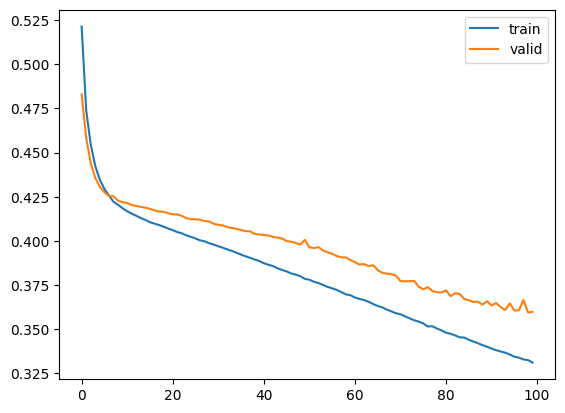

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = classifier.evaluate(X_test, y_test)

Validation and training *Loss* is decreasing but it seems like it is overfitting. There is no noise in the training. Sometimes, the Loss function fluctuates a lot during training which makes the convergence slow. These fluctuations are due to the noisy updates in the parameters.

**Confusion matrix**

50/50 [==============================] - 0s 1ms/step


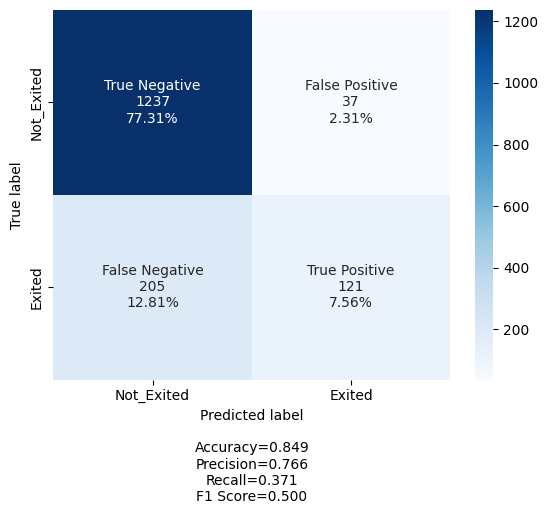

In [ ]:
#Calculating the confusion matrix
y_pred1=classifier.predict(X_val)

#Let's predict using default threshold
y_pred1 = (y_pred1 > 0.5)
cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

As you can see, the above model has good accuracy and precision but have poor recall. There can be two reasons as follows:

1) **Imbalanced dataset:** As you have seen in the EDA, This dataset is imbalanced and it contains more examples belong to non_exited class (0).

2) **Decision Threshold** As you see this dataset is imbalance. Therefore, we can use ROC-AUC to find the optimal threshold and use the same for prediction.

Lets try to tune the decision threshold, apply SMOTE to balance the dataset and configure some other hyperparameters accordingly

### Model Building: Neural Network model with Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
def create_model():
      #Initializing the neural network
      model = Sequential()
      #Adding the input layer with 64 neurons and relu as activation function
      model.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))
      # Adding the first hidden layer with 32 neurons with relu as activation functions
      model.add(Dense(32,activation='relu'))
      # Adding the output layer
      model.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer
      optimizer = tf.keras.optimizers.Adam(0.001)
      # Complining the model with binary cross entropy as loss function and accuracy as metrics
      model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
      return model

In [ ]:
model=create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history = model.fit(X_train,y_train,batch_size=32,validation_data=(X_val,y_val),epochs=100,verbose=1)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4512 - accuracy: 0.7998 - val_loss: 0.4334 - val_accuracy: 0.8106
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8283 - val_loss: 0.4177 - val_accuracy: 0.8263
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3970 - accuracy: 0.8327 - val_loss: 0.4077 - val_accuracy: 0.8344
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.8356 - val_loss: 0.4027 - val_accuracy: 0.8331
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3752 - accuracy: 0.8403 - val_loss: 0.3967 - val_accuracy: 0.8350
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3660 - accuracy: 0.8473 - val_loss: 0.3878 - val_accuracy: 0.8425
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8481 - val_loss: 0.3799 - val_accuracy: 0.8469

**Loss function**

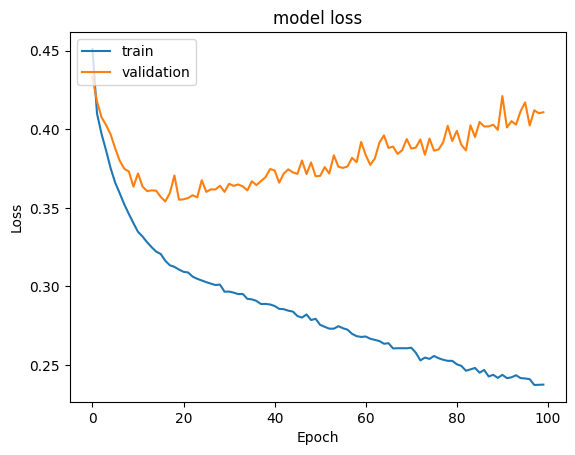

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

It can be observed from the above image, this model is severely overfitting. Since deep learning models are very sensitive to overfitting due to a large number of parameters. we need to find the optimal point where the training should be stopped.

**Early stopping:**

During training, the model is evaluated on a holdout validation dataset after each epoch. If the performance of the model on the validation dataset starts to degrade or no improvement (e.g. loss begins to increase or accuracy begins to decrease), then the training process is stopped after certain iterations. The model at the time that training is stopped is then used and is known to have good generalization performance.

This procedure is called “early stopping” and is widely used in neural network regularization.

In [ ]:
 # Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
model_e=create_model()
#Fitting the ANN with batch_size = 32 and 100 epochs
history_e = model_e.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val),callbacks=[es_cb])

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.4674 - accuracy: 0.7867 - val_loss: 0.4273 - val_accuracy: 0.8169
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.8238 - val_loss: 0.4140 - val_accuracy: 0.8238
Epoch 3/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3972 - accuracy: 0.8342 - val_loss: 0.4032 - val_accuracy: 0.8369
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8386 - val_loss: 0.3953 - val_accuracy: 0.8369
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3731 - accuracy: 0.8413 - val_loss: 0.3870 - val_accuracy: 0.8394
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3638 - accuracy: 0.8462 - val_loss: 0.3741 - val_accuracy: 0.8481
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3557 - accuracy: 0.8520 - val_loss: 0.3685 - val_accuracy: 0.8444

**Loss function**

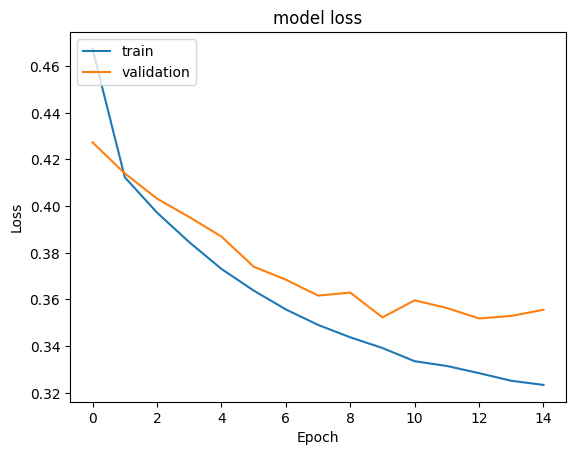

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_e.history['loss'])
plt.plot(history_e.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

As you can see from the above graph, training is stopped at the appropriate epoch because, after that, the loss function started to increase. Therefore, Early stopping prevents overfitting.

**Let's tune the threshold using ROC-AUC**


There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.

Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

Sensitivity = TruePositive / (TruePositive + FalseNegative)


Specificity = TrueNegative / (FalsePositive + TrueNegative)

Where:

Sensitivity = True Positive Rate

Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score() and select the threshold with the largest G-Mean value.

200/200 [==============================] - 0s 885us/step
Best Threshold=0.167119, G-Mean=0.802


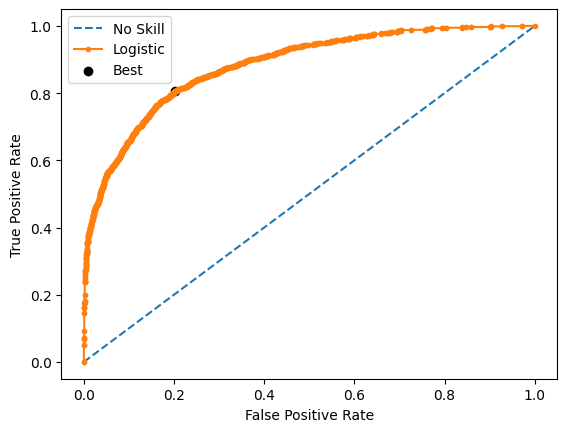

In [ ]:
# predict probabilities
yhat = model_e.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
#Predicting the results using best as a threshold
y_pred_e=model_e.predict(X_val)
y_pred_e = (y_pred_e > thresholds[ix])
y_pred_e

50/50 [==============================] - 0s 911us/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

**Classification report**

In [ ]:
#Accuracy as per the classification report
cr=metrics.classification_report(y_val,y_pred_e)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1274
           1       0.48      0.77      0.59       326

    accuracy                           0.78      1600
   macro avg       0.70      0.78      0.72      1600
weighted avg       0.84      0.78      0.80      1600



**Confusion matrix**

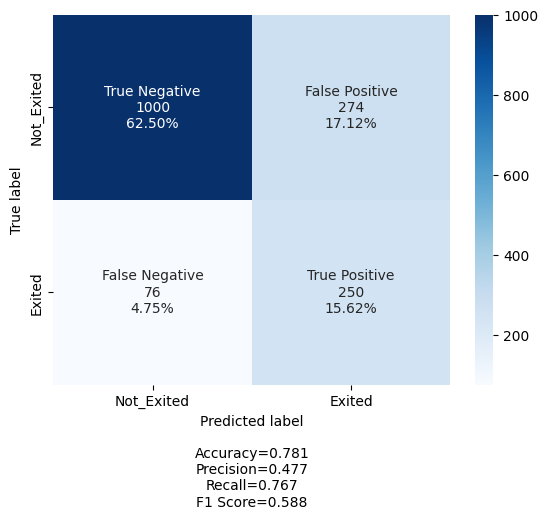

In [ ]:
#Calculating the confusion matrix

cm1=confusion_matrix(y_val, y_pred_e)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

As you can see, the recall of the model is changed but accuracy got decreased. Let's try to decrease the number of neurons in the hidden layer and add dropout to the model since the above model is overfitting.



### Model Improvement: Neural Network model with Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_3 = Sequential()
#Adding the input layer with 32 neurons and relu as activation function
model_3.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
# Adding dropout with ratio of 0.2
model_3.add(Dropout(0.2))
# Adding the first hidden layer with 16 neurons with relu as activation functions
model_3.add(Dense(16,activation='relu'))
# Adding dropout with ratio of 0.1
model_3.add(Dropout(0.1))
# Adding the second hidden layer with 8 neurons with relu as activation functions
model_3.add(Dense(8,activation='relu'))
# Adding the output layer
model_3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Summary of the model
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainabl

In [ ]:
#Compiling the ANN with Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)
# Complining the model with binary cross entropy as loss function and accuracy as metrics
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_3 = model_3.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val),callbacks=[es_cb])

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5123 - accuracy: 0.7588 - val_loss: 0.4538 - val_accuracy: 0.7962
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4515 - accuracy: 0.7967 - val_loss: 0.4376 - val_accuracy: 0.7981
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.8025 - val_loss: 0.4335 - val_accuracy: 0.8031
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.8073 - val_loss: 0.4329 - val_accuracy: 0.8087
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.8066 - val_loss: 0.4276 - val_accuracy: 0.8131
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4300 - accuracy: 0.8119 - val_loss: 0.4229 - val_accuracy: 0.8200
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4240 - accuracy: 0.8197 - val_loss: 0.4189 - val_accuracy: 0.8200

**Loss function**

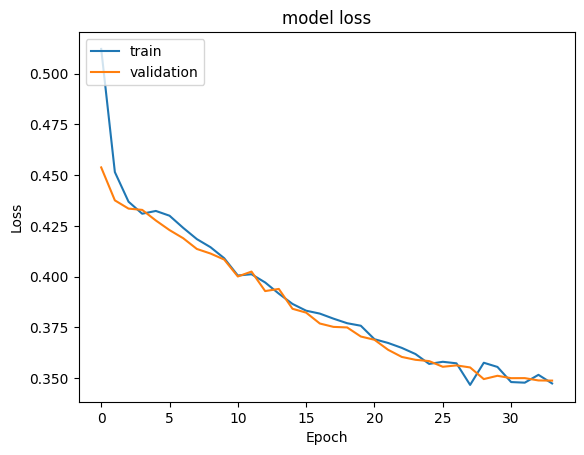

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we can observe that the train and validation curves are having smooth lines. Reducing the number of neurons and adding dropouts to the model worked, and the problem of overfitting was solved.

200/200 [==============================] - 0s 858us/step
Best Threshold=0.220601, G-Mean=0.793


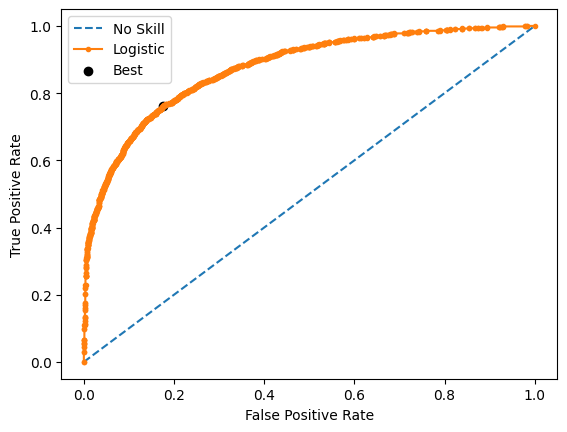

In [ ]:
# predict probabilities
yhat = model_3.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
#Predicting the results using best as a threshold
y_pred_e=model_3.predict(X_val)
y_pred_3 = (y_pred_e > thresholds[ix])
y_pred_3

50/50 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

**Classification report**

In [ ]:
#Accuracy as per the classification report
cr=metrics.classification_report(y_val,y_pred_3)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1274
           1       0.51      0.75      0.61       326

    accuracy                           0.81      1600
   macro avg       0.72      0.78      0.74      1600
weighted avg       0.84      0.81      0.82      1600



**Confusion matrix**

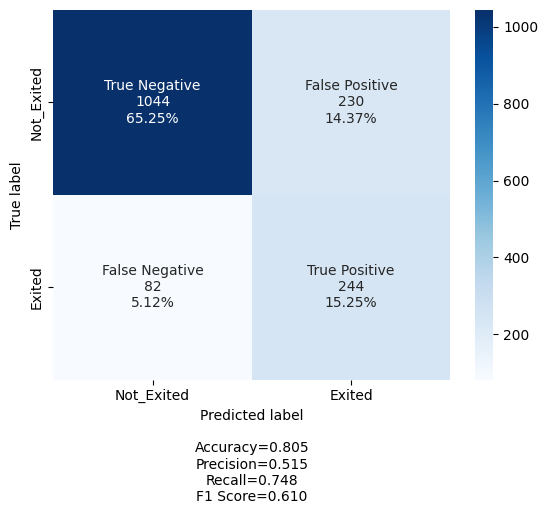

In [ ]:
#Calculating the confusion matrix

cm1=confusion_matrix(y_val,y_pred_3)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

From the above confusion matrix, we can observe that the accuracy and recall are the same, but this model is not overfitting like the previous model. Let's try hyperparameter tuning to get a better model and metrics using GridSearchCV.

### Model Improvement: Neural Network model with Hyperparameter tuning

Some important parameters to look out for while optimizing neural networks are:

-Type of architecture

-Number of Layers

-Number of Neurons in a layer

-Regularization parameters

-Learning Rate

-Type of optimization / backpropagation technique to use

-Dropout rate

-Weight sharing

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
def create_model_v2(dropout_rate=0.1,lr=0.001,layer_1=64,layer_2=32):
    np.random.seed(1337)
    #Initializing the neural network
    model = Sequential()
    # This adds the input layer (by specifying input dimension)
    model.add(Dense(layer_1,activation='relu',input_dim = X_train.shape[1]))
    #Adding dropout layer
    model.add(Dropout(0.5))
    # # Adding the hidden layer
    # Notice that we do not need to specify input dim.
    model.add(Dense(layer_2,activation='relu'))
    # # Adding the output layer
    # Notice that we do not need to specify input dim.
    # we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
    # We use the sigmoid because we want probability outcomes
    model.add(Dense(1, activation='sigmoid'))

    # Adding Adam initializer
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    #compile model
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

**Using Grid search**

We are using grid search to optimize two hyperparameters called **batch size, epochs** due to the limited time. But you can optimize the other hyperparameters as mentioned above

In [ ]:
keras_estimator = KerasClassifier(build_fn=create_model_v2, verbose=1)

In [ ]:
# define the grid search parameters
param_grid = {
    'batch_size':[40, 64, 128],
    "lr":[0.01,0.001,0.1]}


kfold_splits = 3
# Applying GridSearchCV
grid = GridSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_grid=param_grid,n_jobs=-1)

In [ ]:
## Fitting Grid model
grid_result = grid.fit(X_train, y_train,validation_data = (X_val,y_val),verbose=1)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# Printing mean
means = grid_result.cv_results_['mean_test_score']
# Printing standard deviation
stds = grid_result.cv_results_['std_test_score']
# Printing best parameters
params = grid_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
160/160 [==============================] - 1s 3ms/step - loss: 0.4548 - accuracy: 0.8034 - val_loss: 0.4318 - val_accuracy: 0.8150
Best: 0.815936 using {'batch_size': 40, 'lr': 0.01}


* Best model is with the following configuration:  ( It may vary each time code runs )

**Result of Grid Search**

{'batch_size': 40, 'learning_rate":0.01}

**Heuristic for Hyperparameters**

optimizer="adam", layer1_units=64, layer2_units = 32

**Let's create the final model with above mentioned configuration**

In [ ]:
# Creating the model
estimator_v2=create_model_v2(lr=grid_result.best_params_['lr'])
# Printing model summary
estimator_v2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Fitting the model
history_h=estimator_v2.fit(X_train, y_train, epochs=100, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_data=(X_val,y_val))

Epoch 1/100
160/160 [==============================] - 1s 2ms/step - loss: 0.4525 - accuracy: 0.8006 - val_loss: 0.4373 - val_accuracy: 0.8119
Epoch 2/100
160/160 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.8203 - val_loss: 0.4170 - val_accuracy: 0.8275
Epoch 3/100
160/160 [==============================] - 0s 2ms/step - loss: 0.4134 - accuracy: 0.8269 - val_loss: 0.4137 - val_accuracy: 0.8213
Epoch 4/100
160/160 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8280 - val_loss: 0.4142 - val_accuracy: 0.8344
Epoch 5/100
160/160 [==============================] - 0s 2ms/step - loss: 0.4006 - accuracy: 0.8313 - val_loss: 0.3877 - val_accuracy: 0.8313
Epoch 6/100
160/160 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.8352 - val_loss: 0.3856 - val_accuracy: 0.8388
Epoch 7/100
160/160 [==============================] - 0s 2ms/step - loss: 0.3904 - accuracy: 0.8398 - val_loss: 0.3779 - val_accuracy: 0.8394

**Loss function**

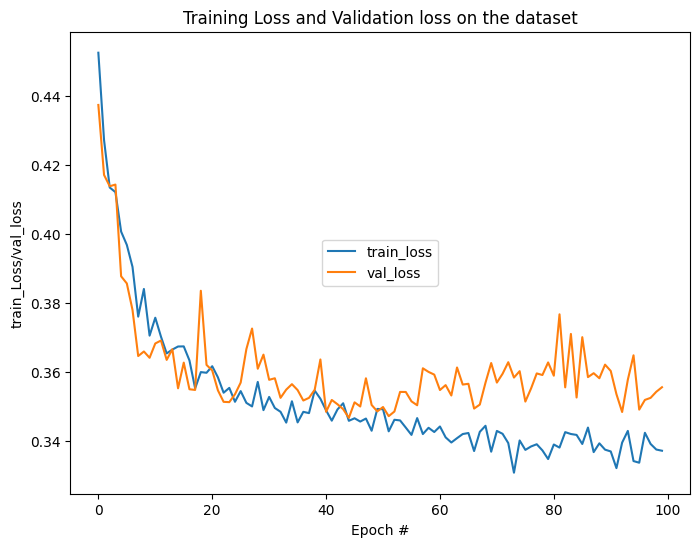

In [ ]:
N =100
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history_h.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history_h.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="center")
plt.show()

As you can seen , the above model's validation curve does not have high slope which means it has  not decreased much. Let's check other metrices to understand how this model works

200/200 [==============================] - 0s 1ms/step
Best Threshold=0.225609, G-Mean=0.810


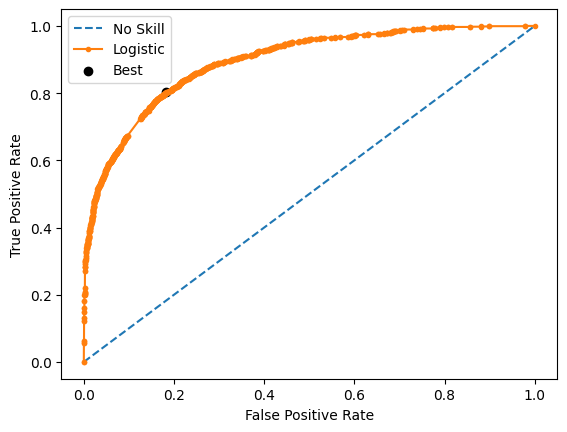

In [ ]:
# predict probabilities
yhat = estimator_v2.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# pridiction
y_pred_h = estimator_v2.predict(X_val)
y_pred_h = (y_pred_h > thresholds[ix])
print(y_pred_h)

50/50 [==============================] - 0s 818us/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [ True]
 [ True]]


**Classification report**

In [ ]:
#lets print classification report
cr=metrics.classification_report(y_val,y_pred_h)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1274
           1       0.48      0.74      0.58       326

    accuracy                           0.78      1600
   macro avg       0.70      0.77      0.72      1600
weighted avg       0.83      0.78      0.80      1600



**Confusion matrix**

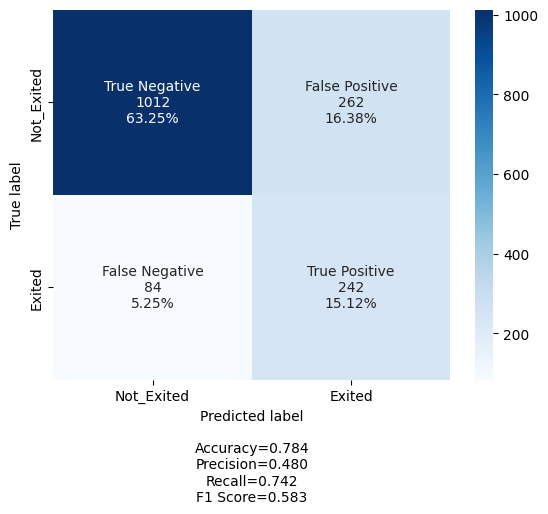

In [ ]:
#Calculating the confusion matrix
cm_h=confusion_matrix(y_val,y_pred_h)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

Hyperparameter tuning is used here  to get a better accuracy but accuracy might differ each time. Other hyperparameters can also be tuned to get a better accuracy. Here, Recall of the model is slighty changed but the accuracy is slightly degraded.





### Model Improvement: Neural Network model with balanced data

**Let's try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [ ]:
sm  = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192, 1) 



As you can see in the graph, Both the class have equal number of examples. Threfore, the datset is balanced now

Let's build a model with the balanced dataset

We will define  the complex model with some dropout layers added between the hidden layers which will help us to prevent overfitting

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the model
model_4 = Sequential()
# Adding input layer of 32 neurons with relu as activation function
model_4.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
# Adding the dropout
model_4.add(Dropout(0.2))
# Adding hidden layer with 16 neurons with relu as activation function
model_4.add(Dense(16,activation='relu'))
# Adding the dropout
model_4.add(Dropout(0.1))
# Adding hidden layer with 8 neurons with relu as activation function
model_4.add(Dense(8,activation='relu'))
# Adding the output layer
model_4.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainabl

In [ ]:
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
# Initializing Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)
# Complining the model with binary cross entropy as loss and accuracy as metrics
model_4.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the model on train and test with batch_size of 64, epochs of 100
history_4 = model_4.fit(X_train,y_train,batch_size=64,epochs=100,verbose=1,validation_data = (X_val,y_val))

Epoch 1/100
160/160 [==============================] - 2s 3ms/step - loss: 0.6432 - accuracy: 0.6333 - val_loss: 0.5592 - val_accuracy: 0.7262
Epoch 2/100
160/160 [==============================] - 0s 2ms/step - loss: 0.5762 - accuracy: 0.7093 - val_loss: 0.5494 - val_accuracy: 0.7312
Epoch 3/100
160/160 [==============================] - 0s 2ms/step - loss: 0.5575 - accuracy: 0.7249 - val_loss: 0.5267 - val_accuracy: 0.7362
Epoch 4/100
160/160 [==============================] - 0s 2ms/step - loss: 0.5484 - accuracy: 0.7318 - val_loss: 0.5455 - val_accuracy: 0.7200
Epoch 5/100
160/160 [==============================] - 1s 3ms/step - loss: 0.5414 - accuracy: 0.7327 - val_loss: 0.5335 - val_accuracy: 0.7256
Epoch 6/100
160/160 [==============================] - 1s 3ms/step - loss: 0.5314 - accuracy: 0.7353 - val_loss: 0.5340 - val_accuracy: 0.7300
Epoch 7/100
160/160 [==============================] - 1s 9ms/step - loss: 0.5199 - accuracy: 0.7435 - val_loss: 0.5139 - val_accuracy: 0.7362

**Loss function**

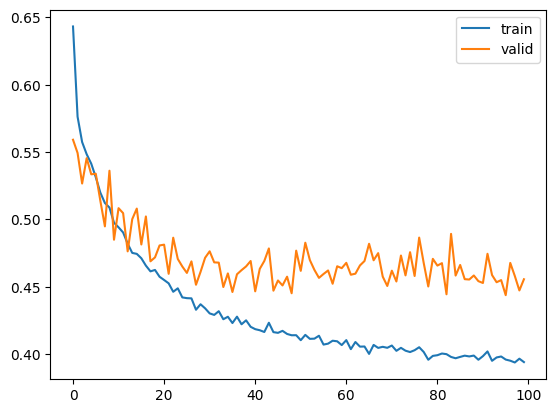

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_4.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

319/319 [==============================] - 0s 895us/step
Best Threshold=0.511896, G-Mean=0.841


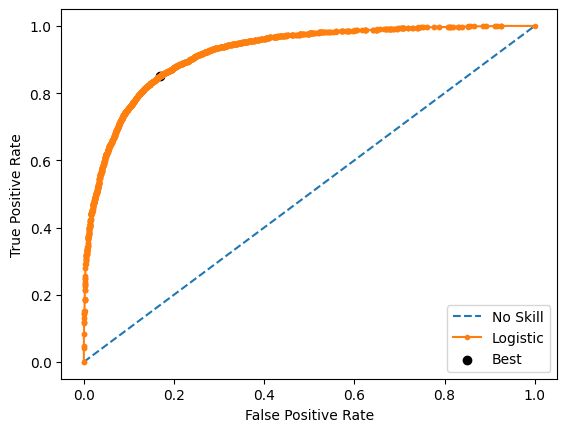

In [ ]:
# predict probabilities
yhat = model_4.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred_s = model_4.predict(X_val)
#Predicting the results using tuned threshold
y_pred_s = (y_pred_s >thresholds[ix])
y_pred_s

50/50 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

**Classification report**

In [ ]:
cr=metrics.classification_report(y_val,y_pred_s)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1274
           1       0.49      0.72      0.58       326

    accuracy                           0.79      1600
   macro avg       0.70      0.76      0.72      1600
weighted avg       0.83      0.79      0.80      1600



**Confusion matrix**

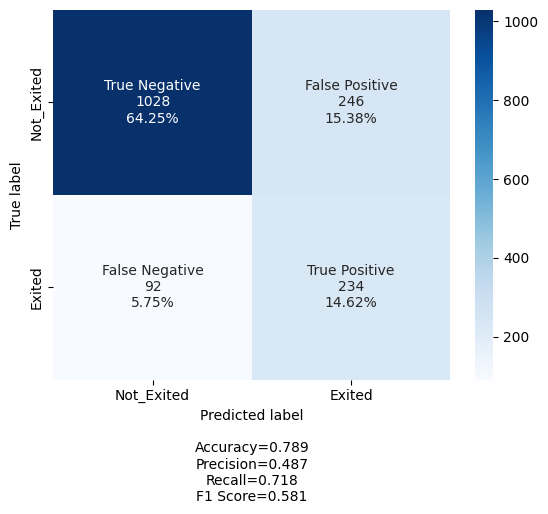

In [ ]:
#Calculating the confusion matrix
cm_s=confusion_matrix(y_val, y_pred_s)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_s,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

## Final Model

319/319 [==============================] - 1s 2ms/step
Best Threshold=0.219161, G-Mean=0.809


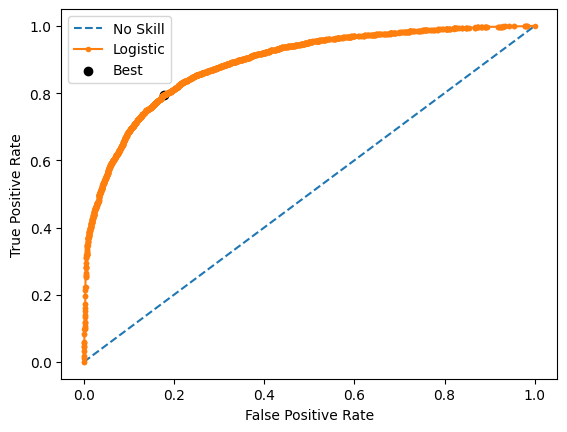

In [ ]:
# predicting probabilities
yhat = model_3.predict(X_train)
# keeping probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculating the roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculating the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locating the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plotting the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# displaying the plot
pyplot.show()

In [ ]:
y_pred_test = model_3.predict(X_test)
y_pred_h = (y_pred_test > thresholds[ix])
print(y_pred_test)

63/63 [==============================] - 0s 1ms/step
[[0.03352005]
 [0.13546205]
 [0.05665458]
 ...
 [0.7656262 ]
 [0.02888152]
 [0.14195867]]


**Classification report**

In [ ]:
#lets print classification report
cr=metrics.classification_report(y_test,y_pred_h)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1593
           1       0.50      0.77      0.60       407

    accuracy                           0.80      2000
   macro avg       0.72      0.79      0.73      2000
weighted avg       0.84      0.80      0.81      2000



**Confusion report**

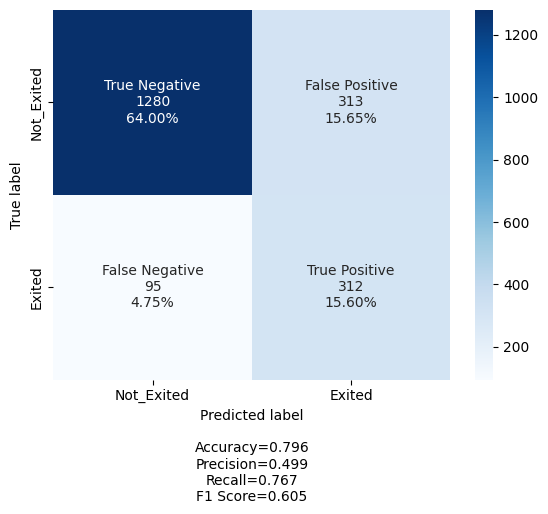

In [ ]:
#Calculating the confusion matrix
cm_h=confusion_matrix(y_test, y_pred_h)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

## Actionable Insights and Business Recommendations

* The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review its target market or review the strategy for retention between the different age groups.

* About the tenure, the clients on either end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure. Worryingly, the bank is losing customers with significant bank balances which are likely to hit their available capital for lending.

* The proportion of female customers churning is also greater than that of male customers.
Interestingly, the majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.


* Unsurprisingly the inactive members have a greater churn.
Worryingly is that the overall proportion of inactive members is quite high suggesting that the bank may need a program implemented to turn this group into active customers as this will have a positive impact on the customer churn.